In [1]:
import os

for dir_path,dir_names,file_names in os.walk("our_data"):
  print(f"There are {len(dir_names)} directories in {len(file_names)} images in {dir_path}")

There are 2 directories in 0 images in our_data
There are 3 directories in 0 images in our_data\test
There are 0 directories in 10 images in our_data\test\jeeswan
There are 0 directories in 10 images in our_data\test\krisha
There are 0 directories in 10 images in our_data\test\suyesh
There are 3 directories in 0 images in our_data\train
There are 0 directories in 40 images in our_data\train\jeeswan
There are 0 directories in 40 images in our_data\train\krisha
There are 0 directories in 40 images in our_data\train\suyesh


In [5]:
# Setup the train and test_directories
train_dir ="our_data/train/"
test_dir ="our_data/test/"


In [6]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['jeeswan' 'krisha' 'suyesh']


In [7]:
# Creating a function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['subject_1.jpg']
Image shape: (273, 273, 3)


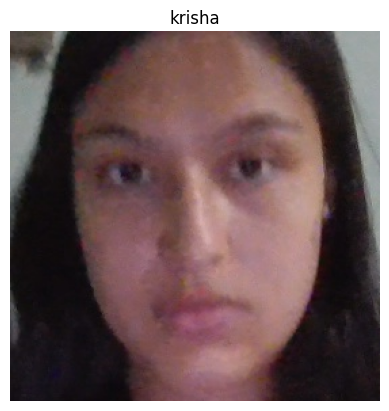

In [13]:
# visualize
import random
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="categorical",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="categorical",
                                             batch_size=32)

Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [16]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                    kernel_size=3,
                    activation="relu",
                    input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation="softmax")
])
model1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history1= model1.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 666ms/step - accuracy: 0.3217 - loss: 1.0928 - val_accuracy: 0.3333 - val_loss: 1.0511
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.4257 - loss: 1.0285 - val_accuracy: 0.6000 - val_loss: 0.9489
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - accuracy: 0.6423 - loss: 0.9029 - val_accuracy: 1.0000 - val_loss: 0.7670
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 1.0000 - loss: 0.6992 - val_accuracy: 1.0000 - val_loss: 0.5022
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - accuracy: 1.0000 - loss: 0.4340 - val_accuracy: 1.0000 - val_loss: 0.2191


In [17]:
import pandas as pd
def plot_loss_curves(history):
  loss=history.history["loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  val_loss=history.history["val_loss"]

  epochs = range(len(history.history["loss"]))
  #Plot loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

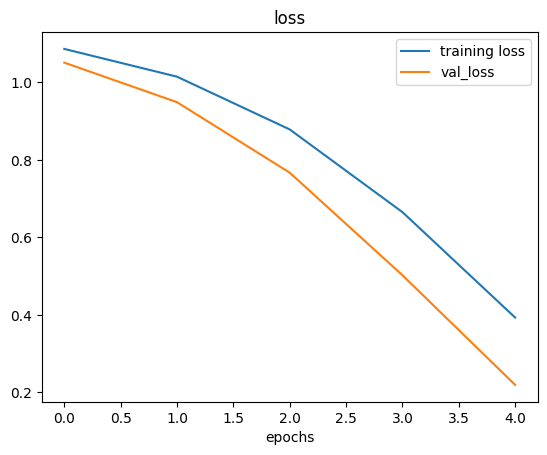

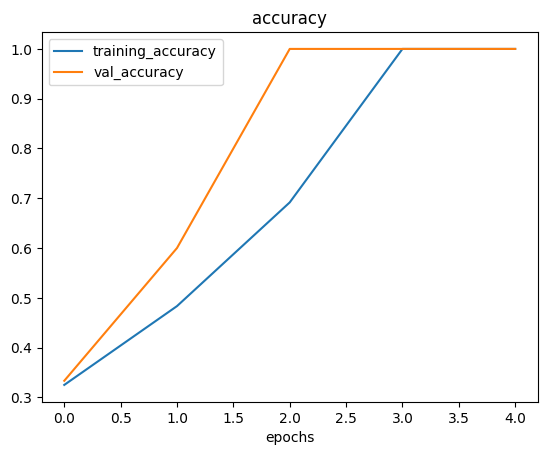

In [18]:
plot_loss_curves(history1)

In [20]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                    kernel_size=3,
                    activation="relu",
                    input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation="softmax")
])

model2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history2= model2.fit(train_data,
                     epochs=5,
                     steps_per_epoch=len(train_data),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.3738 - loss: 0.9945 - val_accuracy: 1.0000 - val_loss: 0.5374
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - accuracy: 1.0000 - loss: 0.4793 - val_accuracy: 1.0000 - val_loss: 0.1995
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step - accuracy: 1.0000 - loss: 0.1510 - val_accuracy: 1.0000 - val_loss: 0.0603
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 1.0000 - loss: 0.0448 - val_accuracy: 1.0000 - val_loss: 0.0130
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.0037


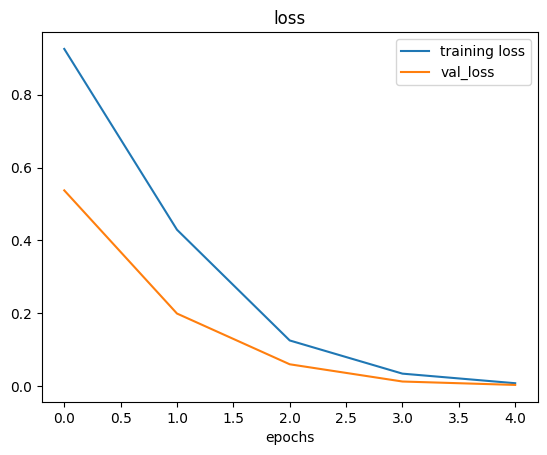

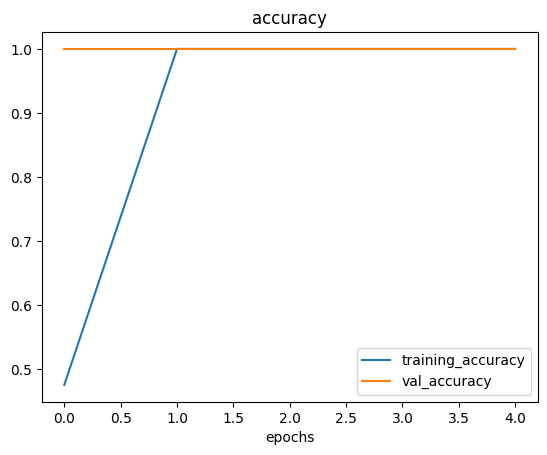

In [25]:
plot_loss_curves(history2)

In [22]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   target_size=(224,224))

Found 120 images belonging to 3 classes.


In [24]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                    kernel_size=3,
                    activation="relu",
                    input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                       padding="valid"),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,2,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3,activation="softmax")
])

model3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history3= model3.fit(train_data_augmented,
                     epochs=5,
                     steps_per_epoch=len(train_data_augmented),
                     validation_data=test_data,
                     validation_steps=len(test_data))

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 706ms/step - accuracy: 0.2771 - loss: 1.0980 - val_accuracy: 0.6667 - val_loss: 0.9891
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 801ms/step - accuracy: 0.7531 - loss: 0.9777 - val_accuracy: 0.6667 - val_loss: 0.8469
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 819ms/step - accuracy: 0.6883 - loss: 0.8565 - val_accuracy: 1.0000 - val_loss: 0.6403
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 564ms/step - accuracy: 0.9602 - loss: 0.6346 - val_accuracy: 1.0000 - val_loss: 0.4096
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 678ms/step - accuracy: 0.9383 - loss: 0.4913 - val_accuracy: 1.0000 - val_loss: 0.2034


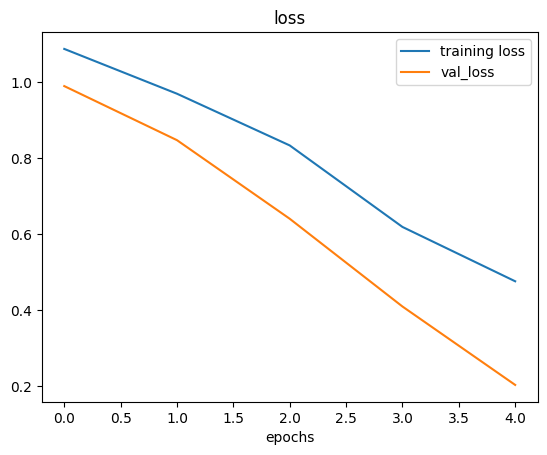

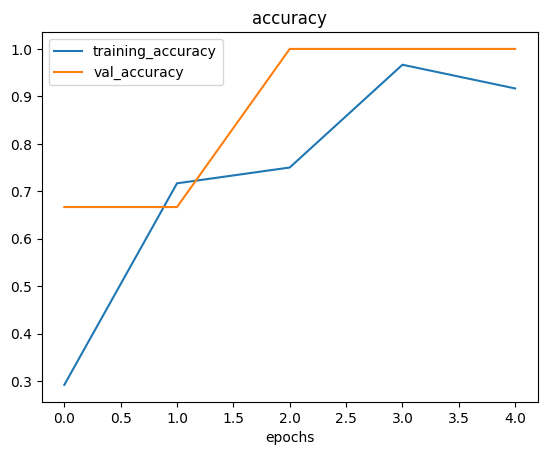

In [27]:
plot_loss_curves(history3)

In [28]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [29]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model
  and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Add logic for multiclass
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    # Get the predicted class
    pred_class = class_names[int(tf.round(pred[0]))]
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


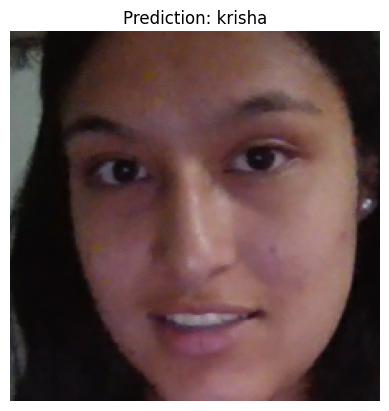

In [35]:
pred_and_plot(model3,r"D:\FInal Year project\Face-Recognition-Attendance-System\model\our_data\test\krisha\subject_41.jpg",class_names=class_names)

In [39]:
model3.save('static/face_recognition_model.h5')